In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

from keras.models import load_model
from keras.utils import to_categorical

C:\Users\Andri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
test = pd.read_csv('Dataset/test.csv')

In [3]:
X_test, y_test = test.drop('label', axis=1), test['label'].values
y_test = to_categorical(y_test)

In [4]:
test_result = {
    'model': ['2 Layers and 150 Nodes','3 Layers and 150 Nodes','4 Layers and 100 Nodes'],
    'prob_score': [],
    'predictions': [],
    'accuracy_score': [],
    'roc_curve': [],
    'auc_score': []
} 

def test_models(source_model):
    model = load_model(source_model)
    prob_score = model.predict(X_test)
    test_result['prob_score'].append(prob_score)
    
    predictions = []
    for i in range(len(prob_score)):
        val = np.argmax(prob_score[i])
        predictions.append(val)
    test_result['predictions'].append(predictions)
    
    test_result['accuracy_score'].append(accuracy_score(test['label'], predictions))
    
    test_result['roc_curve'].append(roc_curve(test['label'], prob_score[:,1]))
    
    test_result['auc_score'].append(roc_auc_score(test['label'], prob_score[:,1]))

In [5]:
test_models('Trained Models/model 2layers and 150nodes.h5')
test_models('Trained Models/model 3layers and 150nodes.h5')
test_models('Trained Models/model 4layers and 100nodes.h5')

In [6]:
test_result['accuracy_score']

[0.8, 0.8, 0.75]

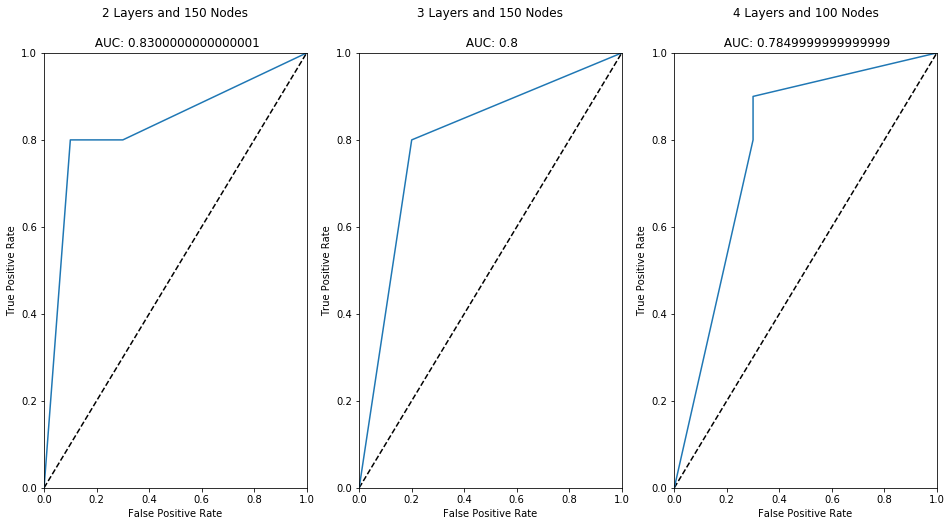

In [7]:
plt.figure(figsize=(16,8))

for i in range(3):
    fpr, tpr, thresh = test_result['roc_curve'][i]
    
    plt.subplot(1,3,i+1)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.ylim([0,1])
    plt.xlim([0,1])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{}\n\n AUC: {}'.format(test_result['model'][i],test_result['auc_score'][i]))

plt.show()

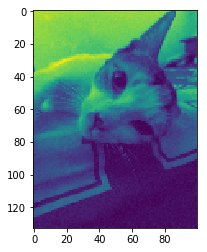

In [8]:
#Finally, let's check how it works
plt.imshow(X_test.iloc[0].values.reshape(133,100))

#It's claudia!

In [9]:
test_result['predictions'][0][0] #index 0 for the 1st model, then index 0 for the 1st prediction result

#The machine says it's Claudia!!! It's right!!!

0

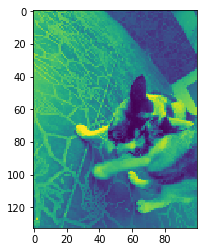

In [10]:
#Let's check again
plt.imshow(X_test.iloc[9].values.reshape(133,100))

#It's Lucy!

In [11]:
test_result['predictions'][0][9]

#The machine says it's Lucy!!! It's right again!!!

1

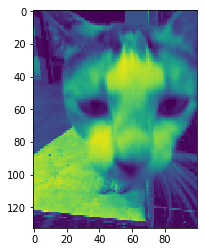

In [12]:
#Let's check again
plt.imshow(X_test.iloc[2].values.reshape(133,100))

#It's Claudia!

In [13]:
test_result['predictions'][0][2]

#Well, the machine got it wrong now, maybe because Claudia too close to the camera

1